Correlations of  Beachwatch stations with Weather and River Flow

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')

In [2]:
bw_pkg =  mp.open_package('http://library.metatab.org/ceden.waterboards.ca.gov-beachwatch-sandiego-2.zip')
env_pkg =  mp.open_package('http://library.metatab.org/sandiegodata.org-water_quality-3.zip')

In [3]:
env_pkg

In [4]:
bw_pkg

In [36]:
env = env_pkg.resource('tides_river_rain').read_csv(parse_dates=True)
bw = bw_pkg.resource('beachwatch-sd').read_csv(parse_dates=True)

In [91]:
bw = bw[(bw.analyte == 'Coliform, Total') & (bw.unit=='MPN/100 mL')]
bw.methodname.value_counts() # Does selecting on this matter?

SM 9221 B      23592
MTF            19352
Colilert-18     4474
SM 9222 B         93
SM 9221 E          4
Name: methodname, dtype: int64

In [201]:
_ = bw[['stationcode','sampledate','result']]\
        .set_index('sampledate').groupby(['stationcode',pd.Grouper(freq='d')]).max()
_ = _.unstack(0)
_.columns  = _.columns.get_level_values(1)
bw_uns = _

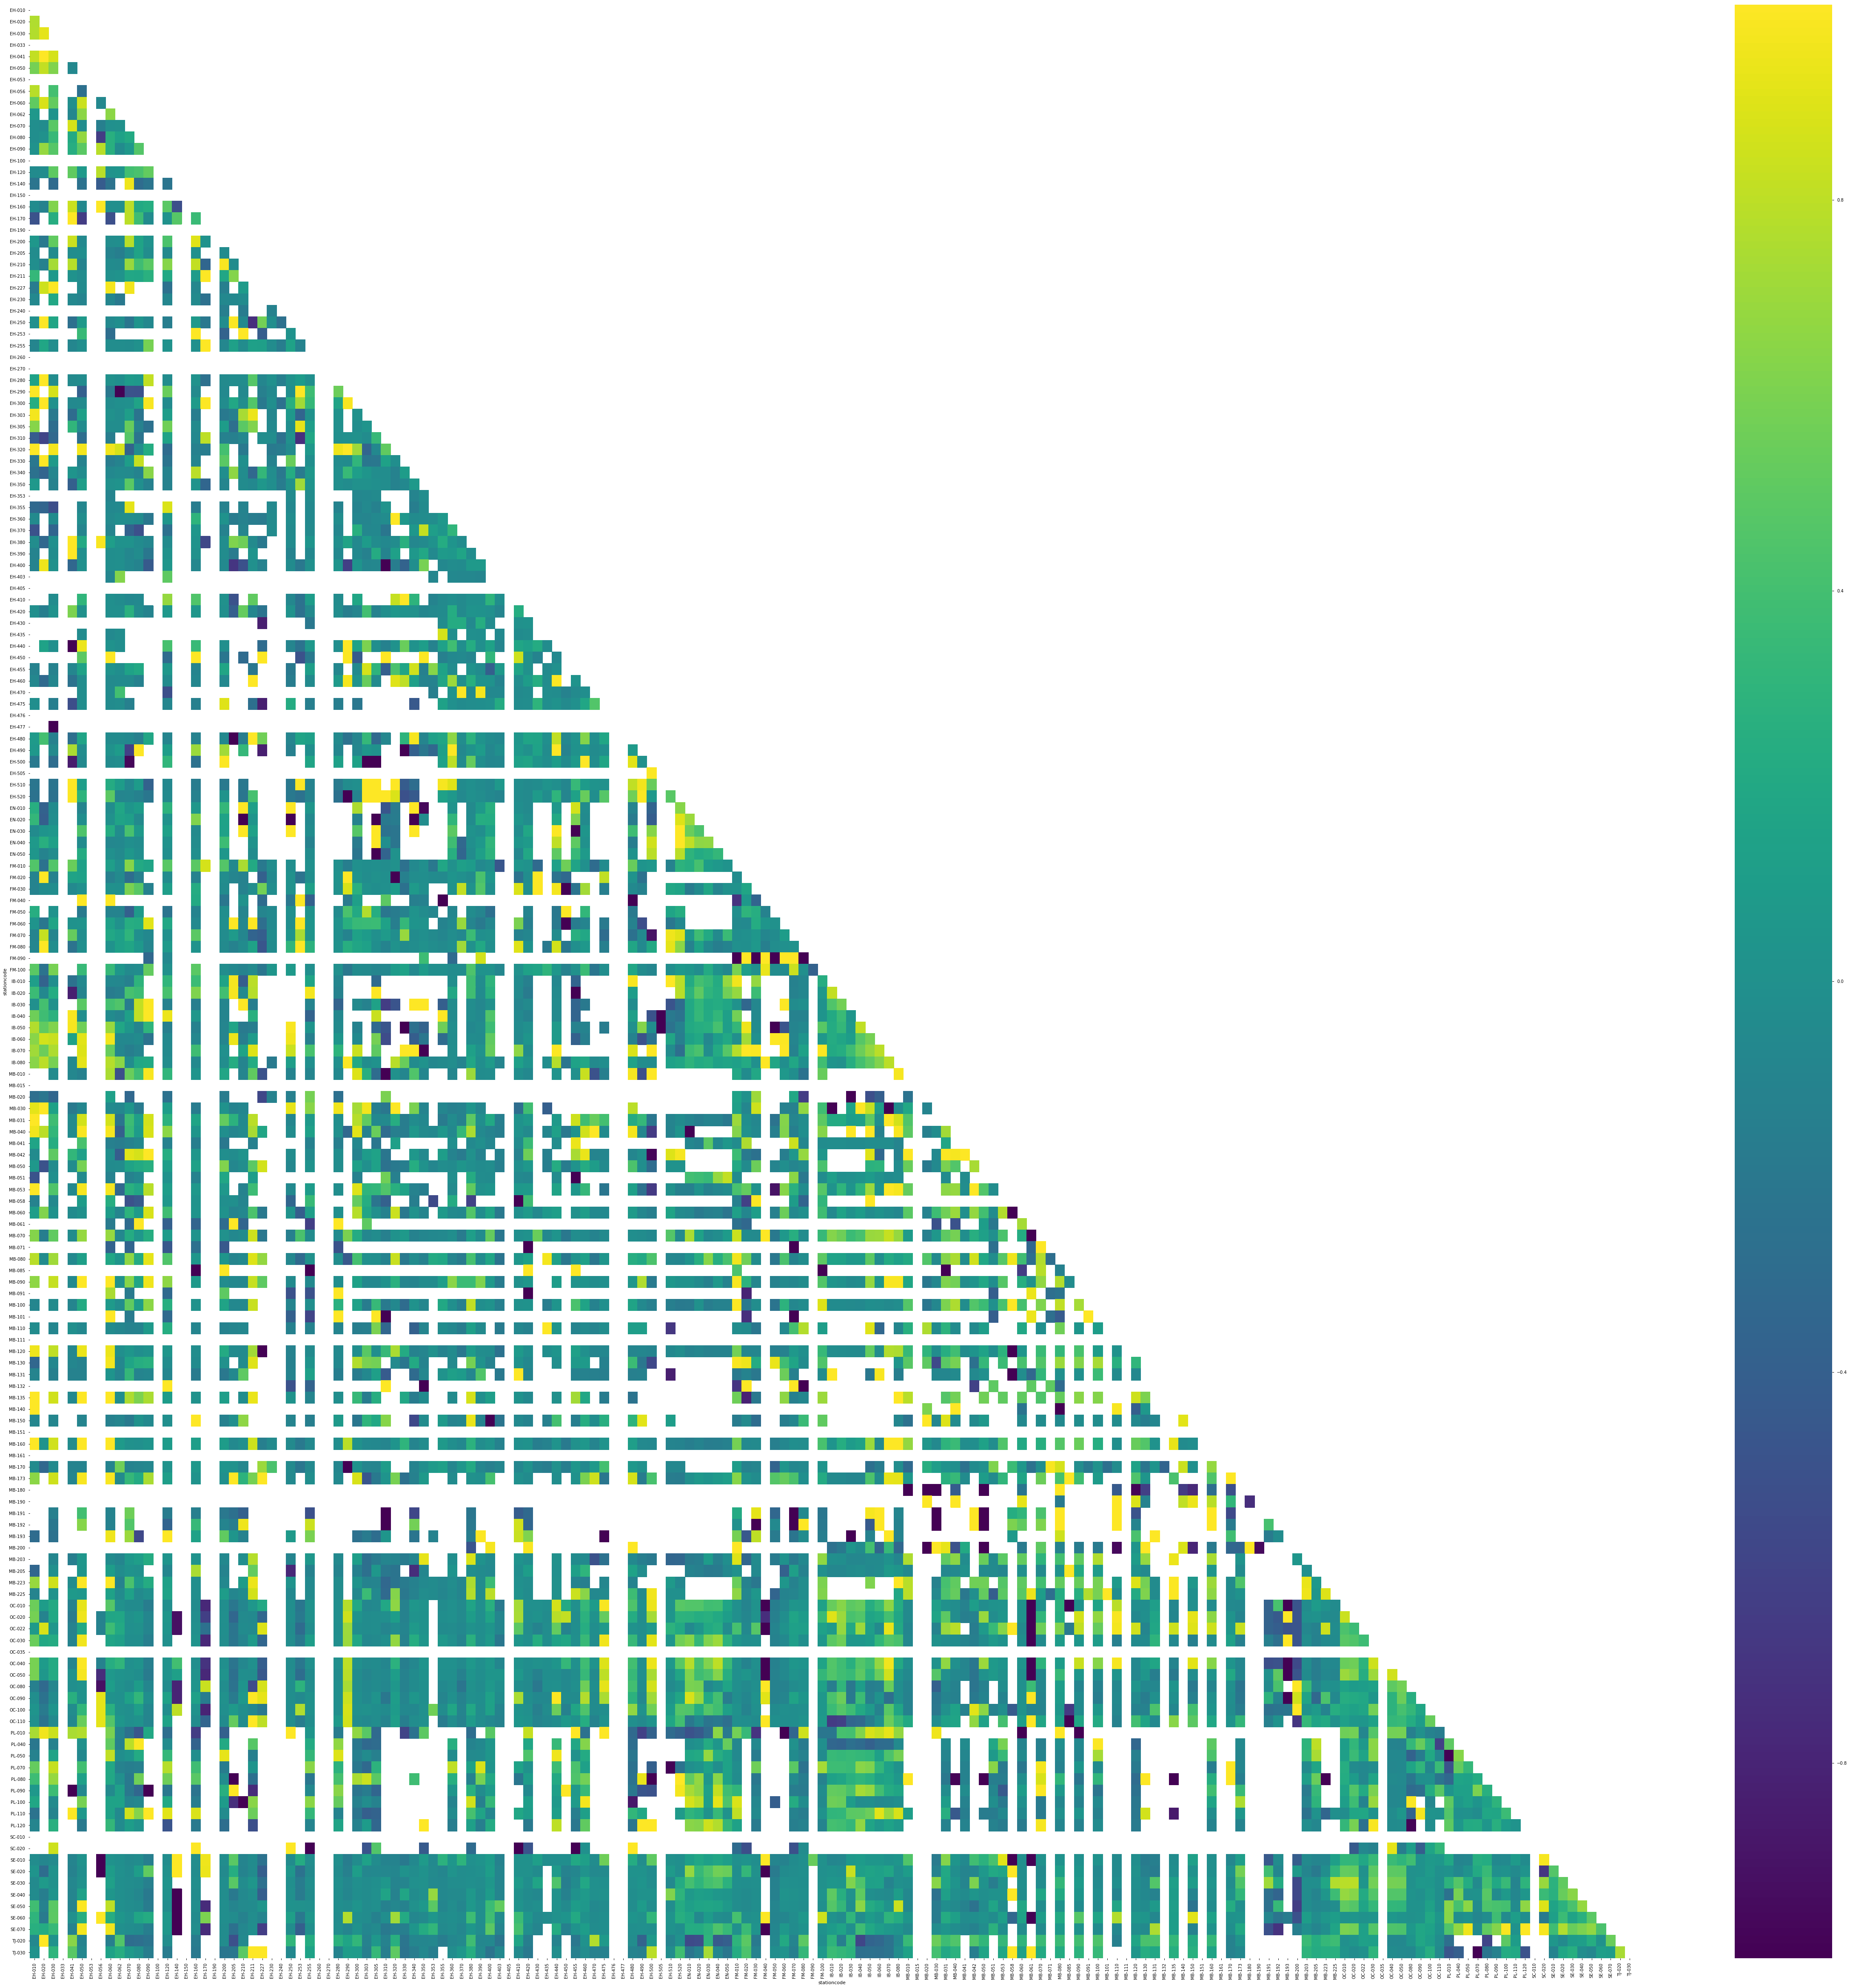

In [202]:
cm = bw_uns.corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(.5*len(_.columns),.5*len(_.columns)))
sns.heatmap(cm, mask=mask, cmap = 'viridis')  

In [213]:
_ = cm.stack().sort_values(ascending=False).to_frame()
_.columns = ['result']
_[_.result< .99999].head(20)

,,result
stationcode,stationcode,
FM-080,MB-192,0.999973
MB-192,FM-080,0.999973
MB-223,EH-050,0.999937
EH-050,MB-223,0.999937
MB-110,EH-435,0.999930
EH-435,MB-110,0.999930
IB-080,MB-223,0.999928
MB-223,IB-080,0.999928
FM-060,EH-205,0.999923


In [132]:
a = env.set_index('date')
b = _.reset_index().set_index('sampledate')
b.columns  = b.columns.get_level_values(1)
cor = b.join(a)

In [ ]:
cor.corrwith(cor.dailyprecip).sort_values(ascending=False).head(10)

In [ ]:
cor.corrwith(cor.discharge_rate).sort_values(ascending=False).head(10)

In [ ]:
cor.corrwith(cor.wl_max).sort_values(ascending=False).head(10)